In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os


zip_file_path = "/content/drive/MyDrive/archive (2).zip"
extract_dir = "/content"

if os.path.exists(zip_file_path):
  try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
      zip_ref.extractall(extract_dir)
    print(f" Succesfully extracted {zip_file_path} to {extract_dir}")

  except zipfile.BadZipFile:
    print(f"Error: The file at {zip_file_path} is not a valid zip file.")

  except Exception as e:
    print(f"An error occurred while extracting the zip file: {e}")

else:
  print(f"Error: {zip_file_path} does not exixt.")



 Succesfully extracted /content/drive/MyDrive/archive (2).zip to /content


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import glob
import cv2
import tensorflow as tf
from tensorflow import keras

In [4]:
train = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

In [5]:
size = 224

In [6]:
train_genrator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 90,
    width_shift_range = 0.0,
    height_shift_range = 0.0,
    shear_range = 0.0,
    zoom_range = 0.0,
    horizontal_flip = False,
    vertical_flip = False,
    rescale = 1/255.0,
    preprocessing_function = None,
    validation_split = 0.1,
).flow_from_directory(train,
                      batch_size = 164,
                      target_size = (size, size),
                      subset = "training",
                      color_mode = "rgb",
                      class_mode = "categorical",
                      shuffle = True
                      )

Found 63282 images belonging to 38 classes.


In [7]:
train_genrator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

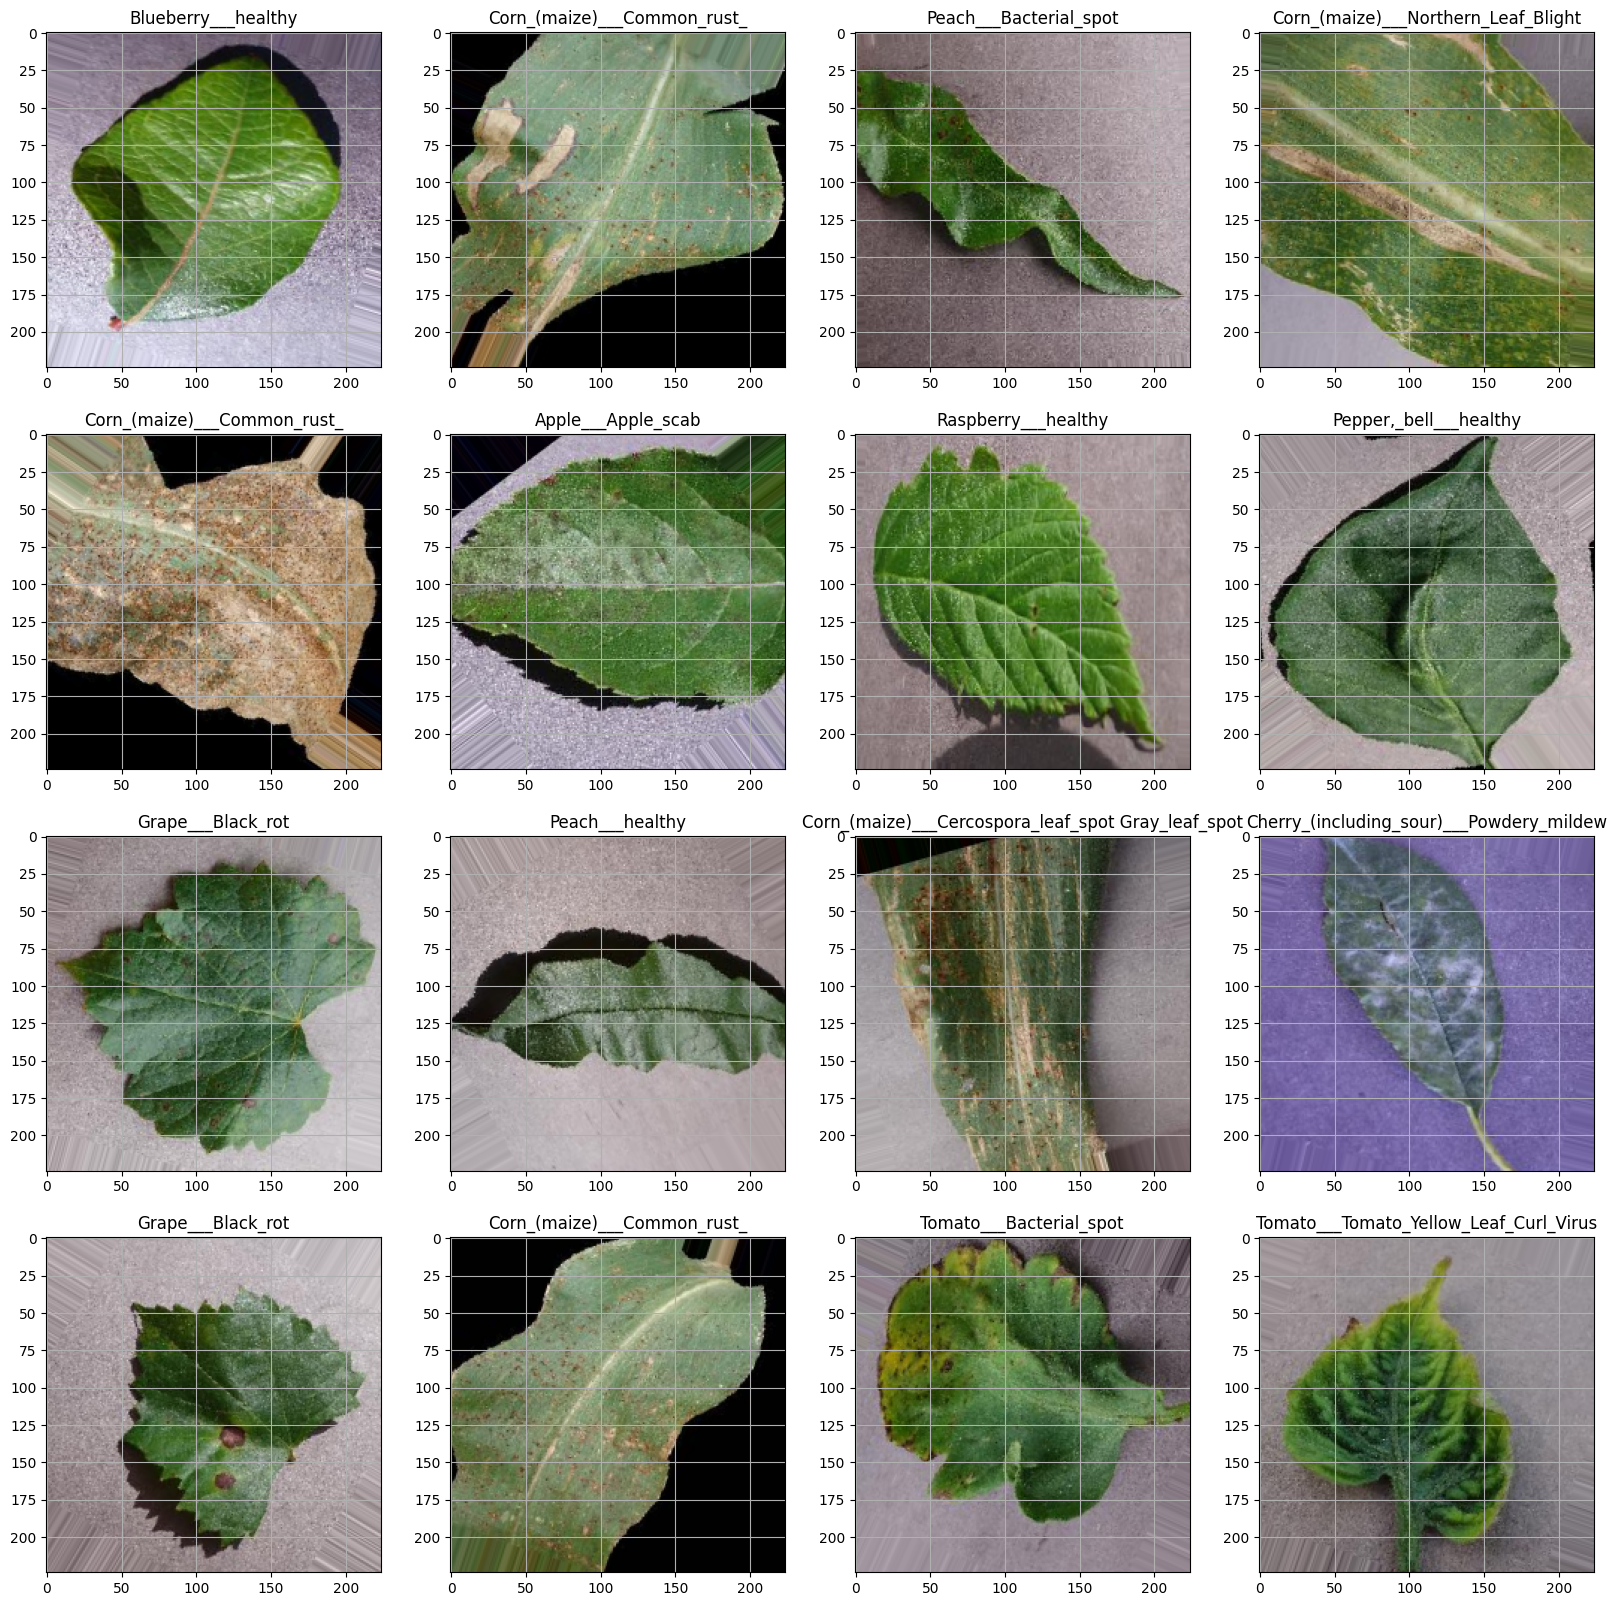

In [8]:
classes = list(train_genrator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_genrator:
  for i in range(0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_batch[i])
    plt.title(classes[np.where(y_batch[i] == 1) [0] [0] ])
    plt.grid(None)
  plt.show()
  break

In [9]:
valid = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [10]:
valid_genrator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255.0,
    preprocessing_function = None,
    validation_split = 0.1,
).flow_from_directory(valid ,
                      batch_size = 164,
                      target_size = (224, 224),
                      subset = 'validation',
                      color_mode = 'rgb',
                      class_mode = 'categorical',
                      shuffle = False)

Found 1742 images belonging to 38 classes.


In [11]:
test = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [12]:
test_genrator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255.0,
    preprocessing_function = None,
).flow_from_directory(test ,
                      batch_size = 164,
                      target_size = (224, 224),
                      color_mode = 'rgb',
                      class_mode = 'categorical',
                      shuffle = False)

Found 17572 images belonging to 38 classes.


In [13]:
test_genrator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [14]:
# This is to build the Neural Network.
model = keras.models.Sequential()

# Model neural network adding with Pool and convolutional models.
model.add(keras.layers.Conv2D(filters=32, kernel_size=7, strides = 1 , padding = "same" ,activation='relu', name = "Conv1" , input_shape=(224,224,3)))
model.add(keras.layers.MaxPool2D(pool_size = 2, name = "Pool1"))

model.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides = 1 , padding = "same" ,activation='relu', name = "Conv2"))
model.add(keras.layers.MaxPool2D(pool_size = 2, name = "Pool2"))

model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides = 1 , padding = "same" ,activation='relu', name = "Conv3"))
model.add(keras.layers.MaxPool2D(pool_size = 2, name = "Pool3"))

model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides = 1 , padding = "same" ,activation='relu', name = "Conv4"))

# This is the Flatten model adding in the model of nural network. This is convert 2 or 3 Dimensions into 1 Dimension.
model.add(keras.layers.Flatten(name = "Flatten1"))

# This is the dense model get added, and this is a hidden layer. With the debugging the Overfitting using Dropout().
model.add(keras.layers.Dense(128, activation = "relu", name = "Dense1"))
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(64, activation = "relu", name = "Dense2"))
tf.keras.layers.Dropout(0.5)

#Output
model.add(keras.layers.Dense(38, activation = "softmax", name = "Output"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
#The models summary
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 224, 224, 32)   │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1 (MaxPooling2D)            │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 112, 112, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2 (MaxPooling2D)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool3 (MaxPooling2D)            │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4 (Conv2D)                  │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten1 (Flatten)              │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 38)             │         2,470 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,125,990 (99.66 MB)

 Trainable params: 26,125,990 (99.66 MB)

 Non-trainable params: 0 (0.00 B)

None


In [16]:
  from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
  early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5 , restore_best_weights = True)
  model_checkpoint = ModelCheckpoint('best_model.keras', monitor = 'val_loss', save_best_only = True)
  model_ReduceLROnPlateau = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 5 , min_lr = 0.00001)

  callbacks = [early_stopping, model_checkpoint, model_ReduceLROnPlateau]

In [17]:
# Model compilation
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Precision', 'Recall'])

In [18]:
history = model.fit(train_genrator, epochs = 15, validation_data = valid_genrator, callbacks = callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 1009s 3s/step - Precision: 0.6908 - Recall: 0.1366 - accuracy: 0.2806 - loss: 2.6243 - val_Precision: 0.7950 - val_Recall: 0.6033 - val_accuracy: 0.6837 - val_loss: 1.0352 - learning_rate: 0.0010
Epoch 2/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 920s 2s/step - Precision: 0.8390 - Recall: 0.6590 - accuracy: 0.7427 - loss: 0.8333 - val_Precision: 0.8674 - val_Recall: 0.7583 - val_accuracy: 0.8060 - val_loss: 0.5967 - learning_rate: 0.0010
Epoch 3/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 949s 2s/step - Precision: 0.8842 - Recall: 0.7975 - accuracy: 0.8369 - loss: 0.5156 - val_Precision: 0.8833 - val_Recall: 0.8123 - val_accuracy: 0.8416 - val_loss: 0.5117 - learning_rate: 0.0010
Epoch 4/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 880s 2s/step - Precision: 0.9129 - Recall: 0.8603 - accuracy: 0.8851 - loss: 0.3577 - val_Precision: 0.8801 - val_Recall: 0.8341 - val_accuracy: 0.8559 - val_loss: 0.4799 - learning_rate: 0.0010
Epoch 5/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 895s 2s/step - Prec

KeyboardInterrupt: 

In [ ]:
import seaborn as sns

#for accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#for precision
precision = history.history['precision']
val_precision = history.history['val_precision']

#for recall
recall = history.history['recall']
val_recall = history.history['val_recall']

#for loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)


In [ ]:
plt.plot(epochs, acc, color = 'green', label = 'Training Accuracy')
plt.plot(epochs, val_acc, color = 'blue', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.ylim(0, 1.02)
plt.show()

In [ ]:
model_evaluate = model.evaluate(test_genrator)
print('Loss : ', model_evaluate[0])
print('Accuracy : ', model_evaluate[1])
print('Precision : ', model_evaluate[2])
print('Recall : ', model_evaluate[3])